<a href="https://colab.research.google.com/github/Emile55/Pneumonia-Detection-AI/blob/main/Pneumonia_Detection_ResNet50_TransferLearning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🫁 Pneumonia Detection from Chest X-Rays using ResNet50V2
This project implements a Deep Learning model to classify Chest X-Ray images as either **Normal** or **Pneumonia**. I used **Transfer Learning** with a pre-trained ResNet50V2 architecture to achieve high accuracy with limited data.

In [12]:

import os
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Data Acquisition & Setup
In this section, we download the dataset using `kagglehub` and define the paths for our training, testing, and validation sets.

In [13]:
# Download the latest version of the Chest X-Ray dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.


In [5]:
print(path)

/kaggle/input/chest-xray-pneumonia


In [6]:


# Data loading
train_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
test_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"
val_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"

# Paramètres
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create training dataset from directory
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

# Create test dataset from directory
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

# Create validation dataset from directory
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


## Model Architecture & Transfer Learning
The model is built using **ResNet50V2** (pre-trained on ImageNet) as a feature extractor.
* **Base Model**: Frozen layers to preserve pre-trained knowledge.
* **Classification Head**: Global Average Pooling, a Dense layer (128 units), and a Dropout layer to prevent overfitting.
* **Output**: A single neuron with Sigmoid activation for binary classification.

In [7]:


# ResNet50V2 without its "head" (include_top=False)
base_model = tf.keras.applications.ResNet50V2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the pre-trained weights
base_model.trainable = False

# build our final model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,827,201 (90.89 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [8]:
#fit model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 314ms/step - accuracy: 0.7649 - loss: 19.0649 - val_accuracy: 0.6250 - val_loss: 1.1453
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 33s 204ms/step - accuracy: 0.9018 - loss: 0.2482 - val_accuracy: 0.5000 - val_loss: 1.3791
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 204ms/step - accuracy: 0.9018 - loss: 0.2454 - val_accuracy: 0.5000 - val_loss: 1.7526
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9260 - loss: 0.2037 - val_accuracy: 0.6250 - val_loss: 0.7207
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 202ms/step - accuracy: 0.9266 - loss: 0.1942 - val_accuracy: 0.5625 - val_loss: 1.5453
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 33s 205ms/step - accuracy: 0.9033 - loss: 0.2121 - val_accuracy: 0.5625 - val_loss: 0.9997
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 33s 204ms/step - accuracy: 0.8942 - loss: 0.2061 - val_accuracy: 0.8750 - val_loss: 0.5684
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 32s 198ms/step - accuracy: 0.8925 - loss: 

In [9]:
# final test
print("Évaluation on Test dataset ..")
results = model.evaluate(test_ds)
print(f"Précision  : {results[1]*100:.2f}%")

Évaluation sur le dataset de TEST...
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.8486 - loss: 0.3255
Précision finale sur le test : 85.10%


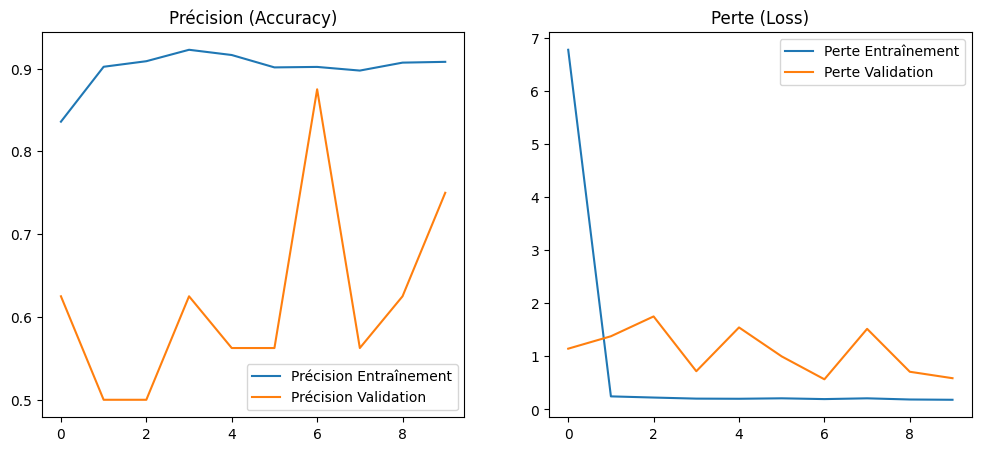

In [10]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(12, 5))

# Accuracy Graph
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Précision Entraînement')
plt.plot(epochs_range, val_acc, label='Précision Validation')
plt.title('Précision (Accuracy)')
plt.legend()

# lost Graph
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perte Entraînement')
plt.plot(epochs_range, val_loss, label='Perte Validation')
plt.title('Perte (Loss)')
plt.legend()

plt.show()

## Visualizing Model Predictions
To verify the model's practical performance, we pick a random image from the test set and ask the AI to provide a diagnosis.

The output displays:
* **The AI Verdict**: The classification based on the probability score.
* **The Confidence Score**: How certain the model is (0% = Healthy, 100% = Pneumonia).
* **The Reality**: The actual label from the dataset for comparison.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


/tmp/ipython-input-960490257.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(prediction[0])


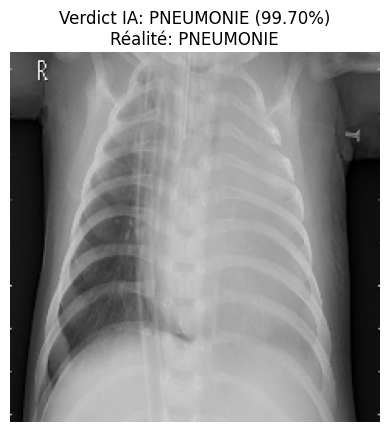

In [14]:


# 1. image for test
for images, labels in test_ds.take(1):
    img = images[0]
    true_label = labels[0]


    prediction = model.predict(np.expand_dims(img, axis=0))
    score = float(prediction[0])


    plt.imshow(img.numpy().astype("uint8"))
    verdict = "PNEUMONIE" if score > 0.5 else "SAIN"
    reel = "PNEUMONIE" if true_label == 1 else "SAIN"

    plt.title(f"Verdict IA: {verdict} ({score:.2%})\nRéalité: {reel}")
    plt.axis("off")

> **Conclusion:** The model successfully identified the pathology with high confidence, demonstrating the effectiveness of our Transfer Learning approach.